### Consigna:
* Graficar una serie de  tiempo de los ejemplos del repositorio

* Redactar un informe describiendo tres series de tiempo distintas(máx.3
páginas)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Catfish.csv: Venta de bagres a lo largo del tiempo

In [6]:
catfish = pd.read_csv("./Datasets/catfish.csv",  header=0, index_col=0, parse_dates=True)

In [7]:
catfish.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


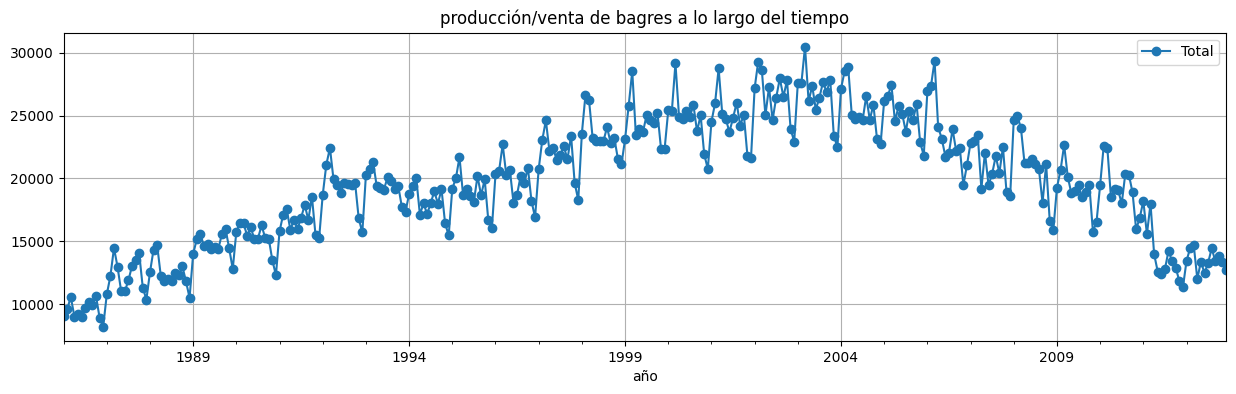

In [8]:
plt.figure(figsize=(15,4))
catfish.plot(marker="o", ax=plt.gca())
plt.title("producción/venta de bagres a lo largo del tiempo")
plt.xlabel("año")
plt.grid(True)

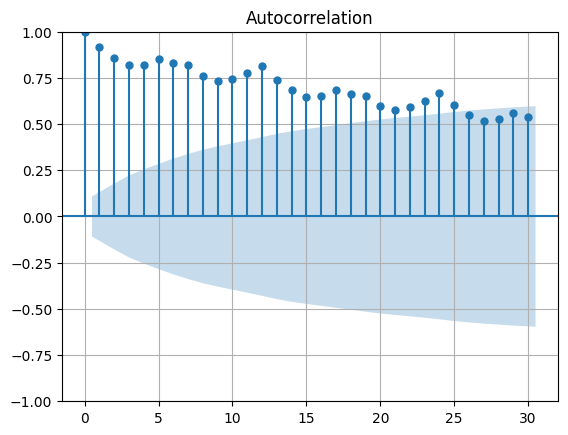

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(catfish, lags=30)
plt.grid(True)
plt.show()

##### Conclusiones

* Se observa que es una serie de tiempo discreta, univariada y no estacionaria.
* Se observa una autocorrelacion alta. Ciclos con frecuencia determinada cada 12 meses
* Tendencia decreciente
* No parece seguir un random walk por la estructura de autocorrelación que tiene 



#### BYMA: cotización de la bolsa de valores de Argentina


In [10]:
byma = pd.read_csv(
    "./Datasets/BYMA.csv",  header=0, index_col=0, 
)

byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)
byma = byma.set_index("fechaHora")

/var/folders/30/4fg_jqmn6t5bqy5p8vdxjmpr0000gp/T/ipykernel_2610/2074999271.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)


<Axes: xlabel='fechaHora'>

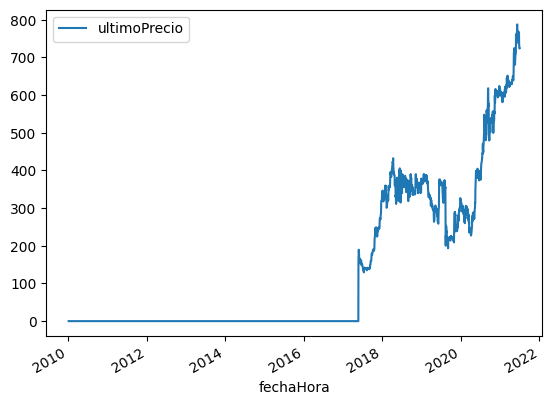

In [11]:
byma.plot()

In [12]:
num_zeros = (byma.ultimoPrecio == 0.0).sum().sum()
num_zeros

1773

In [13]:
# Borramos los que son 0.0
byma = byma[(byma != 0.0).all(axis=1)]
len(byma)

998

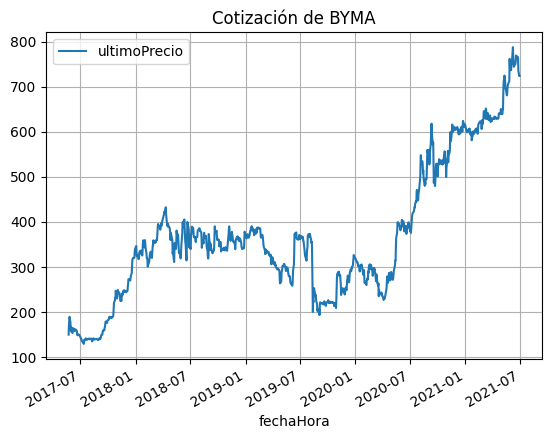

In [14]:
byma.plot()
plt.title("Cotización de BYMA")
plt.grid(True)

##### Conclusiones

* Se observa que es una serie de tiempo discreta, univariada, no estacionaria y no estacional.
* Se ve  una tendencia alcista apartir de julio 2020.
* Aparenta segiur un proceso de random walk

#### Estadisticas de temperatura



In [15]:
temp = pd.read_csv("./Datasets/new_estadisticas.txt", sep="\t", encoding="latin-1")

In [16]:
temp
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Estaciï¿½n      608 non-null    object
 1   Valor Medio de  608 non-null    object
 2   Ene             608 non-null    object
 3   Feb             608 non-null    object
 4   Mar             608 non-null    object
 5   Abr             608 non-null    object
 6   May             608 non-null    object
 7   Jun             608 non-null    object
 8   Jul             608 non-null    object
 9   Ago             608 non-null    object
 10  Sep             608 non-null    object
 11  Oct             608 non-null    object
 12  Nov             608 non-null    object
 13  Dic             608 non-null    object
dtypes: object(14)
memory usage: 66.6+ KB


In [17]:
# Convertir a float

for col in temp.columns[2:]:
    temp[col] = pd.to_numeric(temp[col], errors="coerce")

temp.fillna(np.nan, inplace=True)

In [18]:
# renombro columnas

temp.columns = ["est", "val", 1,2,3,4,5,6,7,8,9,10,11,12]

In [19]:
metrics = [ 
("precipitacion", temp[(temp["val"] == "Precipitaciï¿½n (mm)")]),
("temperatura_media",  temp[(temp["val"] == "Temperatura (ï¿½C)")]),
("temperatura_maxima", temp[(temp["val"] == "Temperatura mï¿½xima (ï¿½C)")]),
("temperatura_minima", temp[(temp["val"] == "Temperatura mï¿½nima (ï¿½C)")]),
("humedad_relativa", temp[(temp["val"] == "Humedad relativa (%)")]),
("velocidad_viento", temp[(temp["val"] == "Velocidad del Viento (km/h)")]),
("nubosidad_total", temp[(temp["val"] == "Nubosidad total (octavos)")]),
("frecuencia_precipitacion",  temp[(temp["val"] == "Frecuencia de dï¿½as con Precipitaciï¿½n superior a 0.1 mm")]) ]   

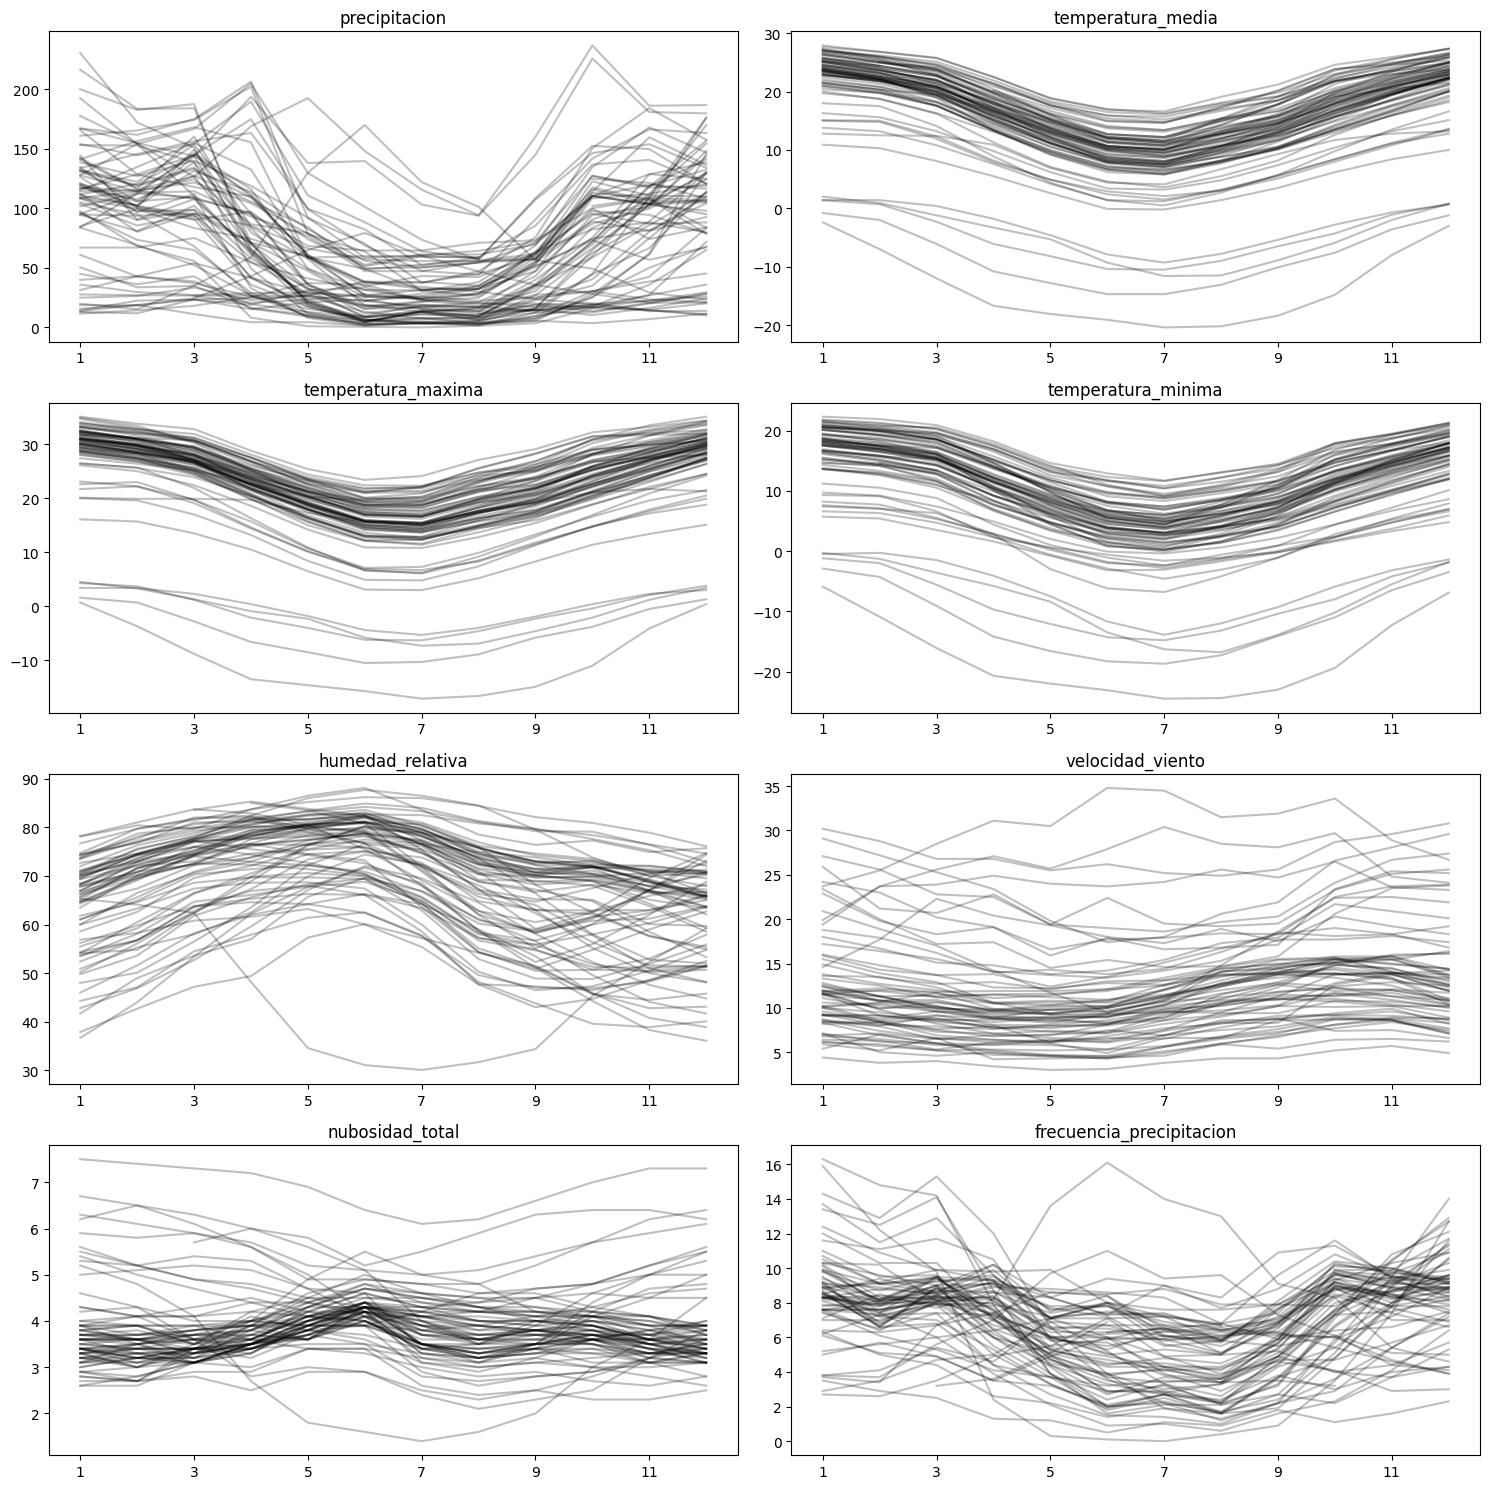

In [20]:
fig, axs = plt.subplots(nrows=len(metrics)//2, ncols=2, figsize=(15, 15))

for i, (metric_name, filtered_data) in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    filtered_data.T[2:].plot(ax=ax, color="k", legend=False, alpha=0.25)
    ax.set_title(metric_name)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes una serie temporal de temperatura almacenada en un DataFrame de Pandas llamado 'df'
# Asegúrate de tener la columna de fechas (timestamp) y la columna de temperatura

# Calcula la media móvil con una ventana de 12 meses (por ejemplo)
window_size = 12
rolling_mean = df['temperatura'].rolling(window=window_size).mean()

# Grafica la serie temporal original y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(df['fecha'], df['temperatura_m'], label='Temperatura Original')
plt.plot(df['fecha'], rolling_mean, color='red', label='Media Móvil (ventana=12 meses)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.title('Serie Temporal de Temperatura y Media Móvil')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
def plot_metrics_by_location(location, metrics):
    for metric_name, df in metrics:
        plt.figure(figsize=(10, 6))
        months = df.columns[2:] 
        
        data = df[df['est'] == location].iloc[:, 2:].values.flatten()
        
        plt.plot(months, data, label=metric_name)
        
        # Customize plot
        plt.title(f"{metric_name} - {location}")
        plt.xlabel('Month')
        plt.ylabel(metric_name)
        plt.legend(loc='upper right')
        plt.xticks(rotation=45)  
        plt.tight_layout(pad=3.0)
        
        plt.show() 

In [23]:
def plot_combined_metrics_for_location(location, metrics):
    plt.figure(figsize=(10, 6))
    months = metrics[0][1].columns[2:]
    lines = [] 
    labels = []
    
    for metric_name, df in metrics:
        if metric_name in ["temperatura_media", "temperatura_maxima", "temperatura_minima"]:
            data = df[df['est'] == location].iloc[:, 2:].values.flatten()
            line, = plt.plot(months, data, label=metric_name)
            lines.append(line)
            labels.append(metric_name)
    
    # precipitacion en segundo y axis
    for metric_name, df in metrics:
        if metric_name == "precipitacion":
            data = df[df['est'] == location].iloc[:, 2:].values.flatten()
            ax = plt.gca().twinx()
            line, = ax.plot(months, data, label=metric_name, color='red')
            lines.append(line)
            labels.append("Precipitacion (mm)")
            ax.set_ylabel('Precipitacion (mm)', color='red')
            ax.tick_params(axis='y', labelcolor='red')
    
    plt.title(f"Estadística temperatura - {location}")
    plt.xlabel('mes')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    
    plt.legend(lines, labels, loc='upper left')
    
    plt.tight_layout(pad=3.0) 
    plt.show()


In [57]:
temp.head(20)

,est,val,1,2,3,4,5,6,7,8,9,10,11,12
0,LA QUIACA OBS.,Temperatura (ï¿½C),12.8,12.5,12.4,10.9,6.9,4.4,4.1,6.7,9.3,11.7,12.8,13.2
1,LA QUIACA OBS.,Temperatura mï¿½xima (ï¿½C),20.1,19.9,19.9,19.7,17.3,15.6,15.4,17.4,19.2,21.1,21.7,21.3
2,LA QUIACA OBS.,Temperatura mï¿½nima (ï¿½C),7.4,7.0,6.3,2.8,-3.0,-6.2,-6.8,-4.2,-1.1,2.8,5.2,6.9
3,LA QUIACA OBS.,Humedad relativa (%),65.3,64.1,62.4,48.2,34.6,31.1,30.1,31.7,34.4,45.3,52.3,59.2
4,LA QUIACA OBS.,Velocidad del Viento (km/h),6.9,7.1,6.5,6.4,6.0,4.9,6.6,6.6,8.6,8.7,8.8,8.3
5,LA QUIACA OBS.,Nubosidad total (octavos),5.2,4.8,4.1,2.7,1.8,1.6,1.4,1.6,2.0,3.0,3.6,4.5
6,LA QUIACA OBS.,Precipitaciï¿½n (mm),97.5,68.4,55.9,8.2,1.0,0.5,0.0,1.4,3.5,16.0,27.3,71.9
7,LA QUIACA OBS.,Frecuencia de dï¿½as con Precipitaciï¿½n super...,15.9,12.2,9.8,2.4,0.3,0.1,0.0,0.4,0.9,3.5,7.4,12.7
8,ORï¿½N AERO,Temperatura (ï¿½C),NaN,25.1,23.9,20.9,17.7,15.0,14.7,17.2,20.1,23.8,25.0,26.0
9,ORï¿½N AERO,Temperatura mï¿½xima (ï¿½C),32.3,31.1,29.4,26.0,23.2,21.2,22.0,25.6,28.3,31.5,32.0,32.6


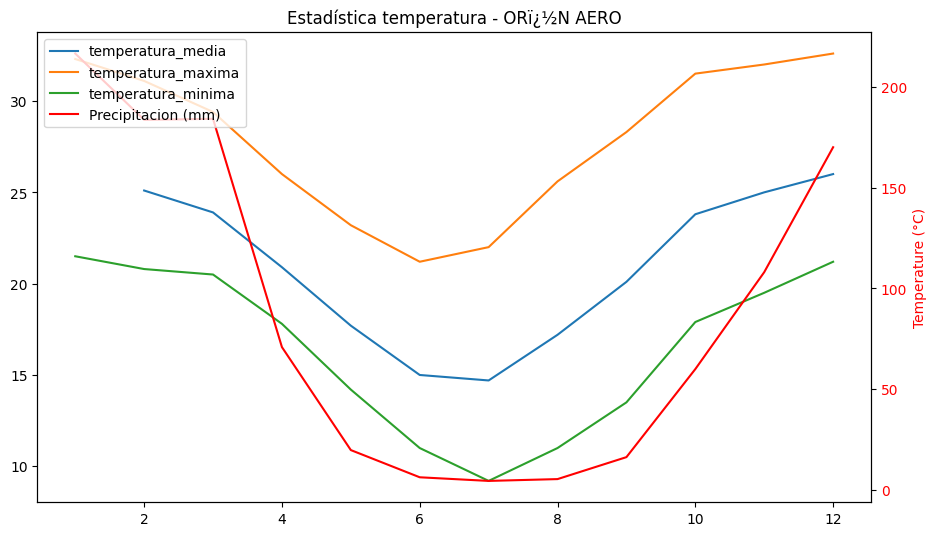

In [58]:
location_to_plot = "ORï¿½N AERO"  
plot_combined_metrics_for_location(location_to_plot, metrics)

#### Conclusiones

Tratamos cada una de estas series de tiempo como univariadas y discretas.

Observamos que se mantiene cierta estacionalidad en los distintos gráficos y que se trata de procesos no estacionarios.

Observamos también cómo a medida que baja la temperatura durante los meses de invierno, disminuyen las precipitaciones. 


In [25]:
location_to_plot = "LA QUIACA OBS." 
#plot_metrics_by_location(location_to_plot, metrics)


In [34]:
from sklearn.cluster import KMeans

def calculate_kmeans(metrics):

    kmeans_results = {}
    for metric_name, df in metrics:
        matriz = df.dropna()[df.columns[2:]]
        km = KMeans(n_clusters=3)
        km.fit(matriz)

        kmeans_results[metric_name] = km.labels_
    
    return kmeans_results

In [50]:
kmeans_labels = calculate_kmeans(metrics)

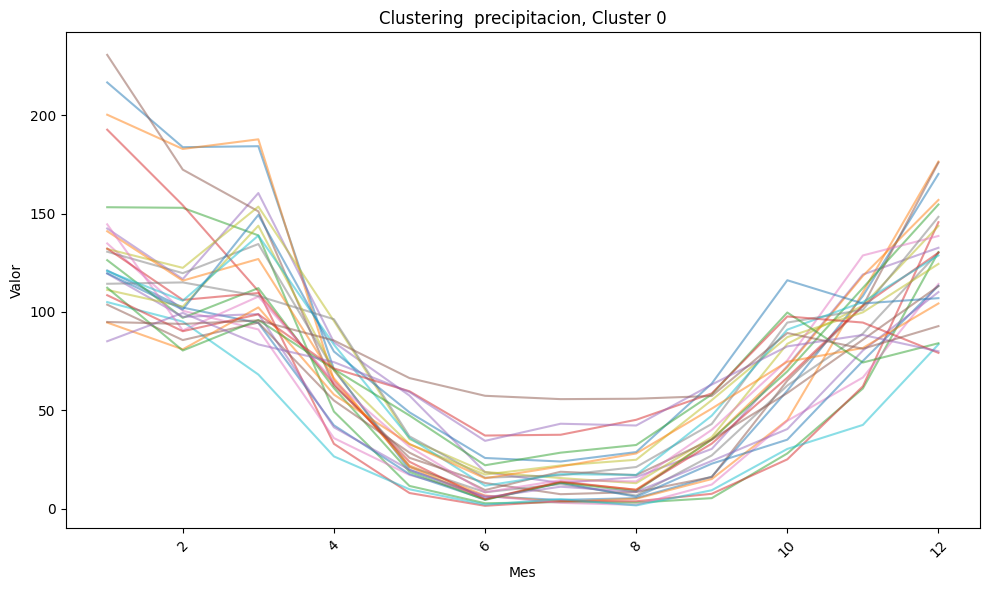

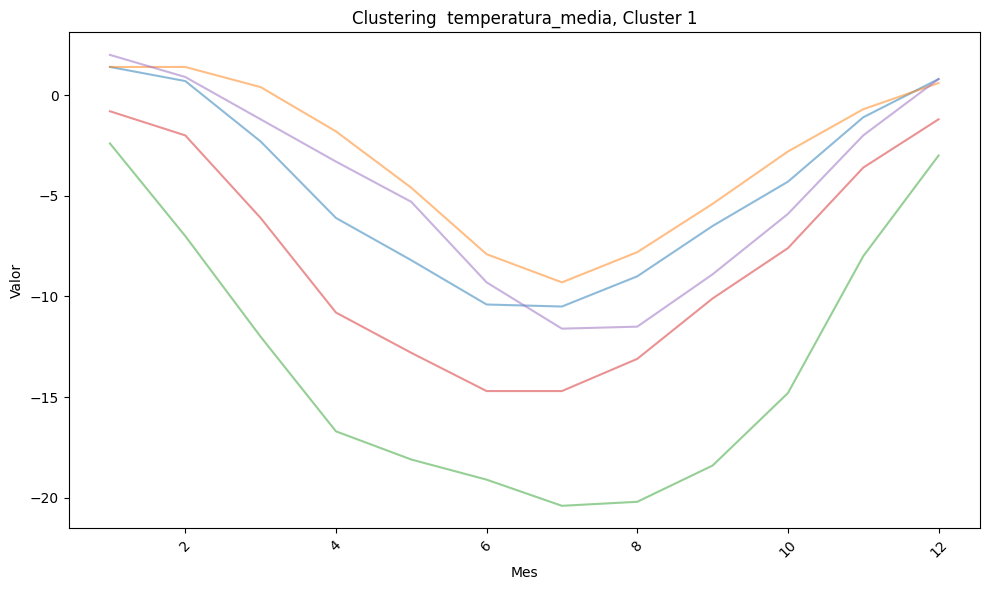

In [52]:
def plot_clustered_data(kmeans_labels, metrics, metric_name, cluster_number):
    plt.figure(figsize=(10, 6))
    
    cluster_labels = kmeans_labels[metric_name]
    
    metric_df = next((df for name, df in metrics if name == metric_name), None)
    if metric_df is None:
        print("Metric not found.")
        return
    
    months = metric_df.columns[2:]
    
    matriz = metric_df.dropna()[metric_df.columns[2:]]
    
    cluster_data = matriz[cluster_labels == cluster_number].T
    plt.plot(months, cluster_data, label=f"Cluster {cluster_number}", alpha=0.5)
    
    plt.title(f"Clustering  {metric_name}, Cluster {cluster_number}")
    plt.xlabel("Mes")
    plt.ylabel("Valor")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

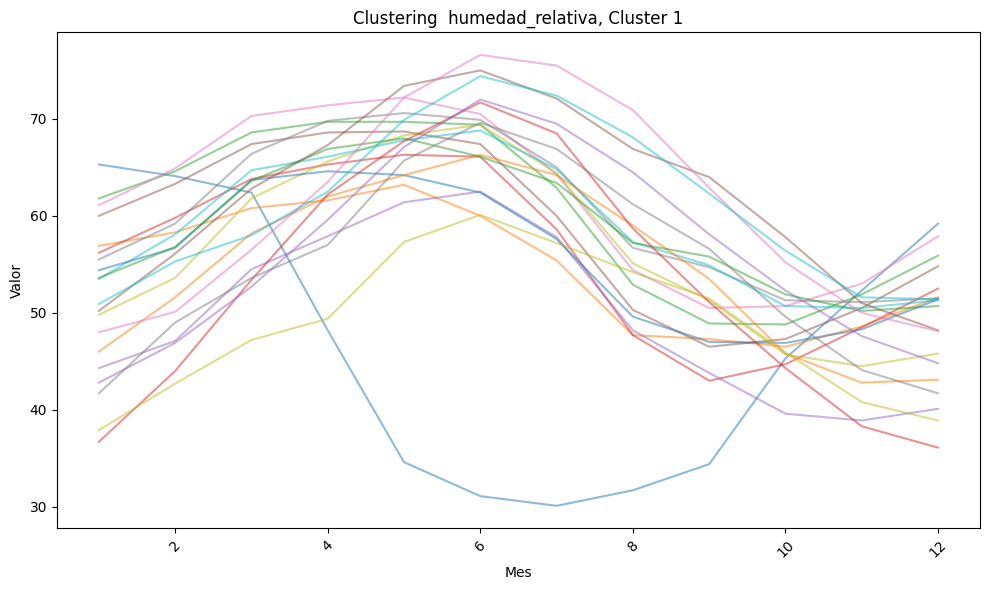

In [53]:
plot_clustered_data(kmeans_labels, metrics, 'humedad_relativa', 1)